<a href="https://colab.research.google.com/github/TeddyAbraham/Yulu-Case-study/blob/main/YuluBCS_Teddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import stats, ttest_ind, shapiro, levene, f_oneway, kruskal, chi2_contingency, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('bike_sharing.txt')
yulu = data
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.shape

(10886, 12)

- We have 10886 rows and there are no null values in any of the columns
- datetime needs to be converted to the datetime Dtype from object.
- 'season', 'holiday', 'workingday', 'weather' are all category column, however they are shouwing as int64 Dtype, as of now no need to make any change.
- There are no missing values in the data.

In [ ]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])
yulu['month'] = yulu['datetime'].dt.month
yulu['day'] = yulu['datetime'].dt.day
yulu['week'] = yulu['datetime'].dt.isocalendar().week
# Adding extra 2 columns month and day for further analysis

In [ ]:
yulu_2011=yulu[(yulu['datetime'].dt.year==2011)]
yulu_2012=yulu[(yulu['datetime'].dt.year==2012)]

total_rentals_2011=yulu_2011['count'].sum()
total_rentals_2012=yulu_2012['count'].sum()

print('Total Rentals in 2011:',total_rentals_2011)
print('Total Rentals in 2012:',total_rentals_2012)
print('Total Rentals:', yulu['count'].sum())

Total Rentals in 2011: 781979
Total Rentals in 2012: 1303497
Total Rentals: 2085476


In [ ]:
for i in yulu.columns:
  print(i, ':', yulu[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822
month : 12
day : 19
week : 46


In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int32         
 13  day         10886 non-null  int32         
 14  week        10886 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(2), int64(8)
memory

In [ ]:
yulu.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,week
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,25.917784
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,14.0
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,26.0
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,40.0
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,52.0
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,15.017269


In  (casual, registered, count) columns we can find that there is  a huge gap between the 75percentile and the max value, with this we can understand that there are outliers in here.
<n/>

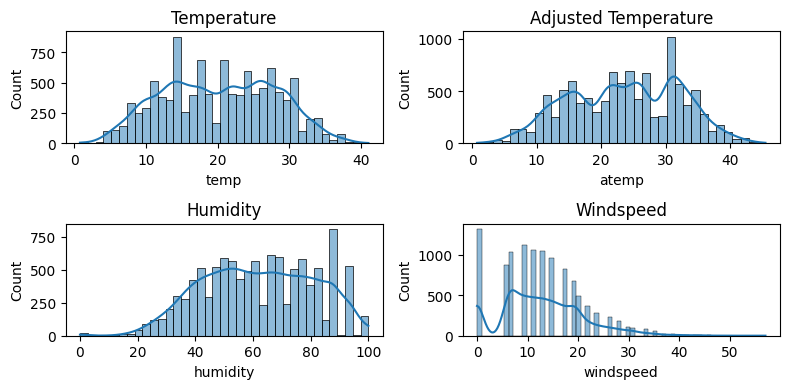

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

sns.histplot(yulu['temp'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Temperature')

sns.histplot(yulu['atemp'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Adjusted Temperature')

sns.histplot(yulu['humidity'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Humidity')

sns.histplot(yulu['windspeed'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Windspeed')

plt.tight_layout()
plt.show()

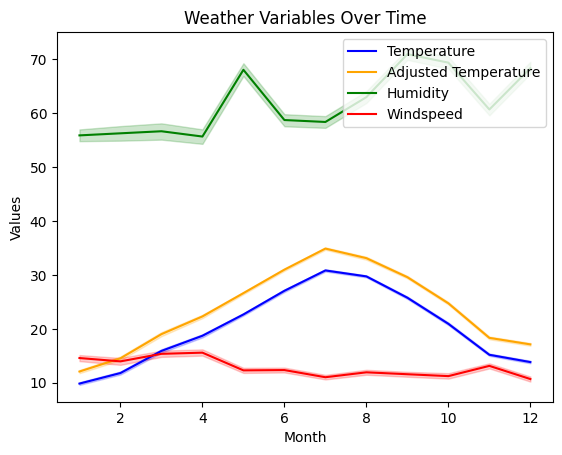

In [ ]:
sns.lineplot(x='month', y='temp', data=yulu, label='Temperature', color='blue')
sns.lineplot(x='month', y='atemp', data=yulu, label='Adjusted Temperature', color='orange')
sns.lineplot(x='month', y='humidity', data=yulu, label='Humidity', color='green')
sns.lineplot(x='month', y='windspeed', data=yulu, label='Windspeed', color='red')

plt.title('Weather Variables Over Time')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()

### Relation between the Dependent(Count) and other Independent variable (holiday, workingday, weather, season)

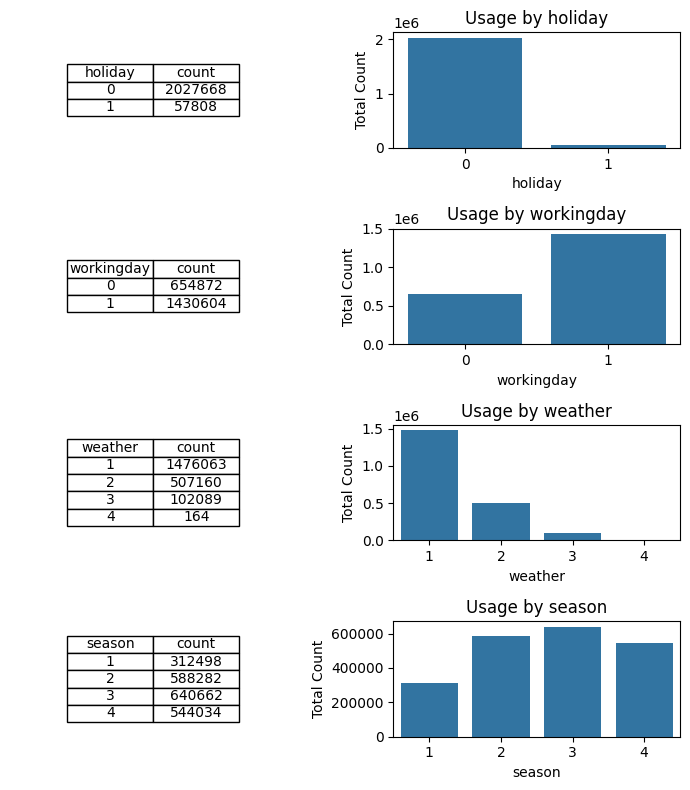

In [ ]:
cat_cols = ['holiday', 'workingday', 'weather', 'season']
fig, axes = plt.subplots(4, 2, figsize=(7,8))

for idx, i in enumerate(cat_cols):
    cat_col = yulu.groupby(i)['count'].sum().reset_index()  # Reset index to convert to DataFrame

    # Display the table on the left side
    axes[idx, 0].axis('tight')
    axes[idx, 0].axis('off')
    table = axes[idx, 0].table(cellText=cat_col.values, colLabels=cat_col.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(.6,1.2)

    # Plot the bar chart (on the right side) with vertical bars
    sns.barplot(x=cat_col[i], y=cat_col['count'], ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Usage by {i}')
    axes[idx, 1].set_xlabel(i)
    axes[idx, 1].set_ylabel('Total Count')

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()
plt.show()


In [ ]:
# cat_cols = ['holiday', 'workingday', 'weather','season']
# for i in cat_cols:
#   cat_col = yulu.groupby(i)['count'].sum()
#   display(cat_col)

#   plt.figure(figsize=(8, 3))
#   sns.barplot(x=cat_col.index, y=cat_col.values)
#   plt.title(f'used by {i}')
#   plt.ylabel('Total Count')
#   plt.xlabel(i)

#   plt.show()

- More people uses yulu bike during holidays.
- Good weather definitly play a key role in the demand.

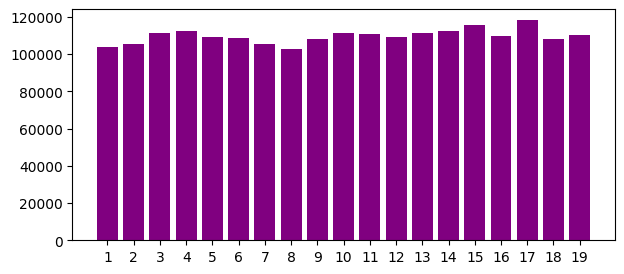

In [ ]:
day = yulu.groupby('day')['count'].sum()
plt.figure(figsize=(7,3))
plt.bar(day.index, day.values, color='purple')
plt.xticks(ticks=day.index, labels=[int(i) for i in day.index])
plt.show()

This data is from (2011-01-01 to 2012-12-19), However day only from 1 to 19 of every month is mentioned. As of now there seems no much difference between days of each month, but having full data will be helpful to analyse if there are any changes during the month end.

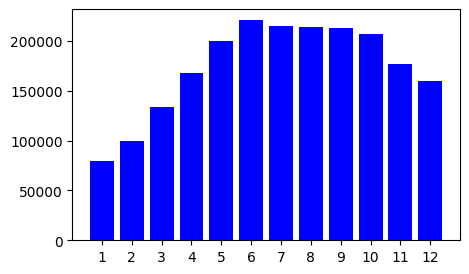

In [ ]:
day = yulu.groupby('month')['count'].sum()
plt.figure(figsize=(5, 3))
plt.bar(day.index, day.values, color='blue')
plt.xticks(ticks=day.index, labels=[int(i) for i in day.index])
plt.show()

Most of the requirements are during May to Oct, winter and spring the demand is less, but bangalore summers(also holidays) are not much hot.

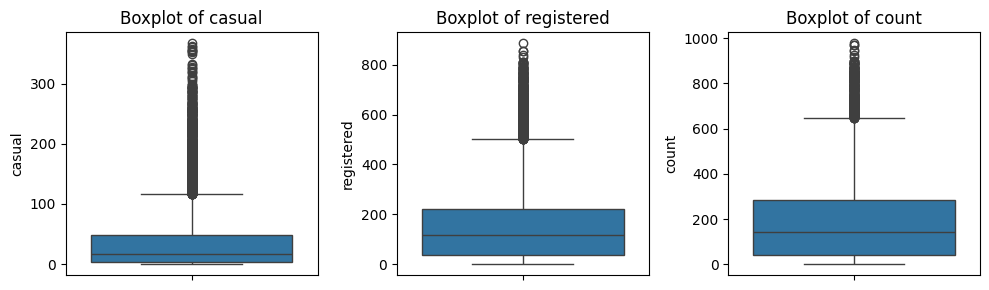

In [ ]:
check_outlier_col = ['casual', 'registered', 'count']
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # 1 row, 3 columns
for ax, col in zip(axes, check_outlier_col):
    sns.boxplot(data=yulu[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
count_Q1 = yulu['count'].quantile(0.25)
count_Q3 = yulu['count'].quantile(0.75)
IQR = count_Q3 - count_Q1
lower_bound = count_Q1 - 1.5 * IQR
upper_bound = count_Q3 + 1.5 * IQR
outliers = yulu[(yulu['count'] < lower_bound) | (yulu['count'] > upper_bound)]
yulu.loc[yulu['count'] > upper_bound, 'count'] = upper_bound
# Clippling outliers to the upper bound of counts

registered_Q1 = yulu['registered'].quantile(0.25)
registered_Q3 = yulu['registered'].quantile(0.75)
IQR = registered_Q3 - registered_Q1
lower_bound = registered_Q1 - 1.5 * IQR
upper_bound = registered_Q3 + 1.5 * IQR
outliers = yulu[(yulu['registered'] < lower_bound) | (yulu['registered'] > upper_bound)]
yulu.loc[yulu['registered'] > upper_bound, 'registered'] = upper_bound
# Clippling outliers to the upper bound of registered users

casual_Q1 = yulu['casual'].quantile(0.25)
casual_Q3 = yulu['casual'].quantile(0.75)
IQR = casual_Q3 - casual_Q1
lower_bound = casual_Q1 - 1.5 * IQR
upper_bound = casual_Q3 + 1.5 * IQR
outliers = yulu[(yulu['casual'] < lower_bound) | (yulu['casual'] > upper_bound)]
yulu.loc[yulu['casual'] > upper_bound, 'casual'] = upper_bound
# Clippling outliers to the upper bound of non registered users

<ipython-input-13-640be1e06dec>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '116.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  yulu.loc[yulu['casual'] > upper_bound, 'casual'] = upper_bound


We have used clipping considering the outliers(sudden increase in demand) might have caused due to certain factors which are rare

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rente

In [ ]:
# Ho - There is a no significant difference between working and non-working days
# H1- There is a significant difference between working and non-working days
# Alpha we consider here at 5%
alpha = .05
working_day = yulu[yulu['workingday'] == 1]['count']
non_working_day = yulu[yulu['workingday'] == 0]['count']

In [ ]:
# If both the data are normally distributed so we will consider what test to be taken
# Ho for shapiro test - The data is normally distributed
# H1 for shapiro test - The data is not normally distributed

working_stat, working_p_value = shapiro(working_day)
non_working_stat, non_working_p_value = shapiro(non_working_day)

print('working_stat :', working_stat, 'working_p_value :', working_p_value)
print('non_working_stat:', non_working_stat, 'non_working_pval:', non_working_p_value)

working_stat : 0.8863904293195669 working_p_value : 7.23783468271281e-59
non_working_stat: 0.8844793251867066 non_working_pval: 3.5436366281973996e-45


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


p_value in both this data is less than the alpha, thus both this data is not normally distributed, so instead of t-test we will use *mannwhitneyu test*

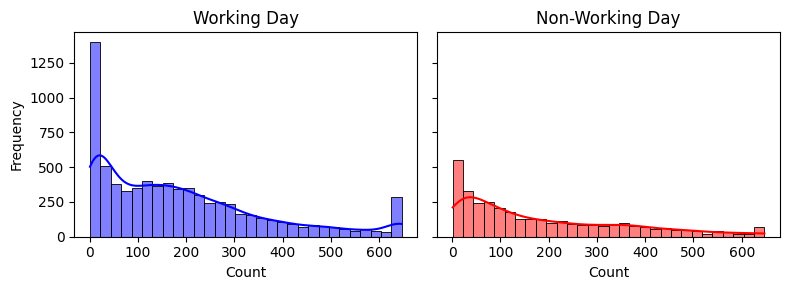

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

sns.histplot(working_day, ax=axes[0], kde=True, color='blue', bins=30)
axes[0].set_title('Working Day')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')

sns.histplot(non_working_day, ax=axes[1], kde=True, color='red', bins=30)
axes[1].set_title('Non-Working Day')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
stat, p_value = mannwhitneyu(working_day, non_working_day, alternative='two-sided')

print("p_value:",p_value)
if p_value < alpha:
    print('Reject H0. A significant difference between working and non-working days')
else:
    print('Fail to reject H0. No significant difference between working and non-working days')


p_value: 0.9467211269367186
Fail to reject H0. No significant difference between working and non-working days


## ANNOVA to check if No. of cycles rented is similar or different in different *weather*

In [ ]:
# H0: No significant difference in the no of cycles rented across different weather conditions
# H1: A significant difference in the number of cycles rented across atlest one weather conditions
# If all the data fulfill the set condition for Anova or should we move to kruskal test.

In [ ]:
weather_1 = yulu[yulu['weather'] == 1]['count']
weather_2 = yulu[yulu['weather'] == 2]['count']
weather_3 = yulu[yulu['weather'] == 3]['count']
weather_4 = yulu[yulu['weather'] == 3]['count']

In [ ]:
# 1. Checking for Normality using sapiro test
# H0 for sapiro: All weather data are normally distributed
# H1 for sapiro: Weathers are not normally distributed
stat1, p_value1 = shapiro(weather_1)
stat2, p_value2 = shapiro(weather_2)
stat3, p_value3 = shapiro(weather_3)
stat4, p_value4 = shapiro(weather_4)

print('stat1 :', stat1, 'p_value1 :', p_value1)
print('stat2 :', stat2, 'p_value2 :', p_value2)
print('stat3 :', stat3, 'p_value3 :', p_value4)
print('stat4 :', stat4, 'p_value4 :', p_value4)
print('As none of the weather is normally distributed we use Kruskal instead of ANOVA')

print('='*80)
# 2, Levene's test for homogeneity of variances
# HO for Lenen's test : homogeneity of variances in all the weather
# HO for Lenen's test : No homogeneity of variances in atleast one weather
stat, p_value = levene(weather_1, weather_2, weather_3, weather_4)
print('stat: ', stat, 'p_value : ',  p_value)
print("Similarly there is no homogenety of varience so instead of ANOVA we use Kruskal test")

stat1 : 0.8987712937101245 p_value1 : 3.723807000853401e-56
stat2 : 0.8865389098401227 p_value2 : 1.7719335162413008e-41
stat3 : 0.7886690347994032 p_value3 : 6.40167565957445e-32
stat4 : 0.7886690347994032 p_value4 : 6.40167565957445e-32
As none of the weather is normally distributed we use Kruskal instead of ANOVA
stat:  99.26177247294002 p_value :  1.8973795397662207e-63
Similarly there is no homogenety of varience so instead of ANOVA we use Kruskal test




- Sapiro test - For Anova all the groups should have been normally distributed, since all the groups fail the sapiro test we conclude that instead of Anova we need to use Kruskal test.
- Levene's test - Similarly in Levene's test there is no homogenity of varience.
- Independance - There is no dependence of data here

*Conclusion*: - For Anova all the conditions should satisfy, as it fails normality and homogenity of varience, we therefor use Kruskal test.


In [ ]:
# If assumptions of ANOVA fail, use kruskal
stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)

print("test statistic:",stat)
print("p_value:",p_value)

if p_value < 0.05:
  print("Reject H0. A significant difference in the number of cycles rented across atlest one weather conditions")
else:
  print("Fail to reject H0. No significant difference in the number of cycles rented across different weather conditions")

test statistic: 354.2643441400564
p_value: 1.7795067600253926e-76
Reject H0. A significant difference in the number of cycles rented across atlest one weather conditions


## ANNOVA to check if No. of cycles rented is similar or different in different *Seasons*

In [ ]:
# H0 : No significant difference in the number of cycles rented across different seasons
# H1 : A significant difference in the number of cycles rented across atlest one season

In [ ]:
season_1 = yulu[yulu['season'] == 1]['count']
season_2 = yulu[yulu['season'] == 2]['count']
season_3 = yulu[yulu['season'] == 3]['count']
season_4 = yulu[yulu['season'] == 4]['count']

In [ ]:
#  1. Checking for Normality using sapiro test
# H0 for sapiro: All seasons data are normally distributed
# H1 for sapiro: Seasons are not normally distributed
stat1, p_value1 = shapiro(season_1)
stat2, p_value2 = shapiro(season_2)
stat3, p_value3 = shapiro(season_3)
stat4, p_value4 = shapiro(season_4)

print('stat1 :', stat1, 'p_value1 :', p_value1)
print('stat2 :', stat2, 'p_value2 :', p_value2)
print('stat3 :', stat3, 'p_value3 :', p_value4)
print('stat4 :', stat4, 'p_value4 :', p_value4)
print("As none of the season is normally distributed we use Kruskal  instead of ANOVA")
print('='*80)
# 2, Levene's test for homogeneity of variances
# HO for Lenen's test : homogeneity of variances in all the seasons
# HO for Lenen's test : No homogeneity of variances in atleast one seasson

stat, p_value = levene(season_1, season_2, season_3, season_4)
print('stat: ', stat, 'p_value : ',  p_value)
print("Similarly there is no homogenety of varience so instead of ANOVA we use Kruskal test")

stat1 : 0.8147439669582819 p_value1 : 2.911832456142803e-48
stat2 : 0.9027969745797303 p_value2 : 1.330654757710811e-38
stat3 : 0.9245845072616039 p_value3 : 3.6766046654389127e-38
stat4 : 0.9057489057257019 p_value4 : 3.6766046654389127e-38
As none of the season is normally distributed we use Kruskal  instead of ANOVA
stat:  199.5119672794296 p_value :  5.7233179707619984e-126
Similarly there is no homogenety of varience so instead of ANOVA we use Kruskal test


1.   Sapiro test - For Anova all the groups should have been normally distributed, since all the groups fail the sapiro test we conclude that instead of Anova we need to use Kruskal test.
2.   Levene's test - Similarly in Levene's test there is no homogenity of varience.
3. Independance - There is no dependence of data here
*Conclusion*: - For Anova all the conditions should satisfy, as it fails normality and homogenity of varience, we therefor use Kruskal test.

In [ ]:
stat, p_value = kruskal(season_1, season_2, season_3, season_4)

print("test statistic:",stat, "p_value:",p_value)

if p_value < 0.05:
  print("Reject H0. A significant difference in the number of cycles rented across atlest one seasons")
else:
  print("Fail to reject H0. No significant difference in the number of cycles rented across different season")

test statistic: 699.2817665514561 p_value: 3.0045514163996123e-151
Reject H0
Atleast one group have different median, so There is a significant difference in the number of cycles rented across different seasons.


# Chi-square test to check if Weather is dependent on the season

In [ ]:
# H0 : Weather and season are independent
# H1 : Weather and season are dependent

In [ ]:
contingency_table = pd.crosstab(yulu['weather'], yulu['season'])
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi2_stat, p_value)
if p_value < alpha:
    print("Reject H0. Weather and season are dependent")
else:
    print("Fail to Reject H0. Weather and season are independent")

49.15865559689363 1.5499250736864862e-07
Reject H0. Weather and season are dependent


<Axes: >

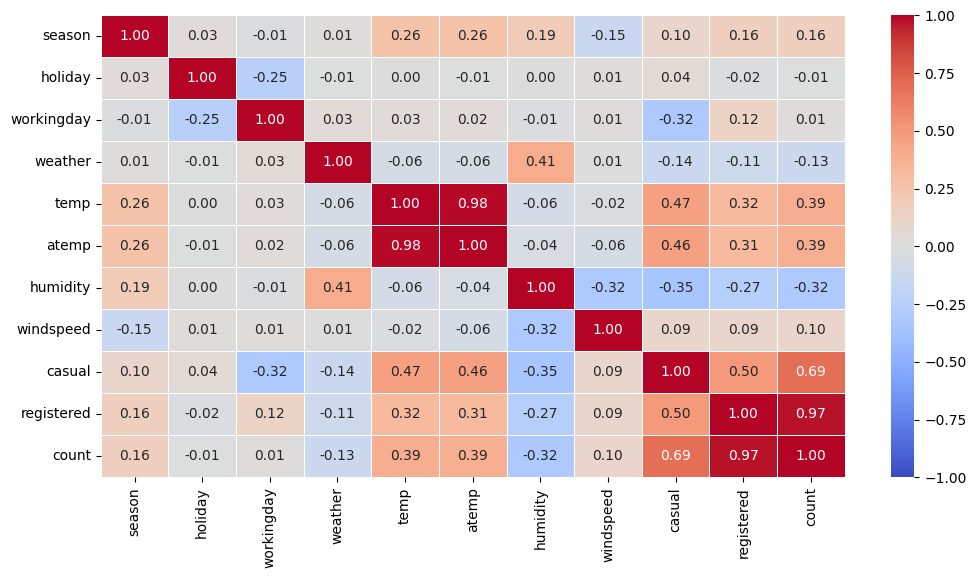

In [ ]:
Yulu_copy = yulu.copy()
Yulu_copy = Yulu_copy.drop('datetime', axis=1)


# Yulu_copy = Yulu_copy[['casual', 'registered', 'count']]

plt.figure(figsize=(12,6))
sns.heatmap(Yulu_copy.corr(), annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

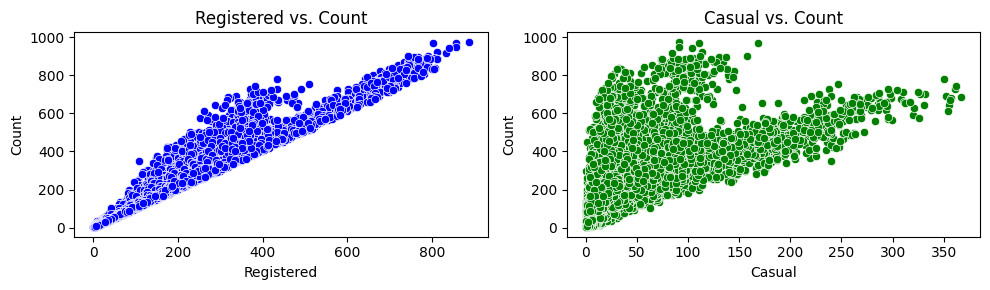

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(ax=axes[0], x=yulu['registered'], y=yulu['count'], color='blue')
axes[0].set_title('Registered vs. Count')
axes[0].set_xlabel('Registered')
axes[0].set_ylabel('Count')

sns.scatterplot(ax=axes[1], x=yulu['casual'], y=yulu['count'], color='green')
axes[1].set_title('Casual vs. Count')
axes[1].set_xlabel('Casual')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

There is a clear correaltion between bike rent in case with both Registered and Casual.

Recommendation :  
- Ensure good qunatity supply during the holiday seasson (Peak season).
- No of Parking stands can be increased along with number of bikes.
- The maintainance for the bike can be done during the non-peak time, ensuring good quality bikes which will further improve the customer satisfaction.
- Parking stand location can be identified near the housing colonies, apartments such that they can reach nearby public transport area like metro stations, major bus-stands etc.
- More attractive offers to be a registered user so as to get a better analysis of tracking demands.